In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.graphics.tsaplots as sgt
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('GOOG.csv')

In [3]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [4]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,982.884677,991.980983,974.031114,983.451723,983.451723,1.723477e+06
std,231.644952,234.464420,229.580341,232.283568,232.283568,8.638005e+05
min,519.500000,522.734009,515.179993,516.830017,516.830017,3.475000e+05
25%,769.570007,774.500000,764.652511,769.252502,769.252502,1.212700e+06
50%,1020.130005,1034.104981,1008.305023,1021.044983,1021.044983,1.488950e+06
75%,1159.880005,1174.482544,1150.543488,1163.472442,1163.472442,1.964575e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,1.116490e+07


In [5]:
data = raw_data.copy()

In [6]:
del data['Open']
del data['High']
del data['Low']
del data['Adj Close']
del data['Volume']
data.head()

,Date,Close
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


In [7]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)
data.head()

,Date,Close
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


In [8]:
data.set_index('Date', inplace=True)

In [9]:
data = data.asfreq('b')

In [10]:
data.head()

,Close
Date,
2015-06-08,526.830017
2015-06-09,526.690002
2015-06-10,536.690002
2015-06-11,534.609985
2015-06-12,532.330017


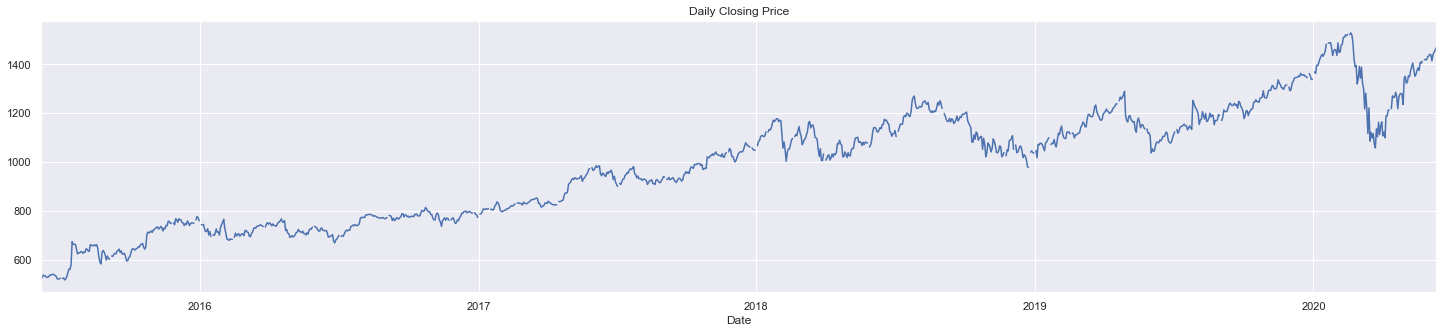

In [11]:
data.Close.plot(figsize=(25,5))
plt.title('Daily Closing Price')
plt.show()

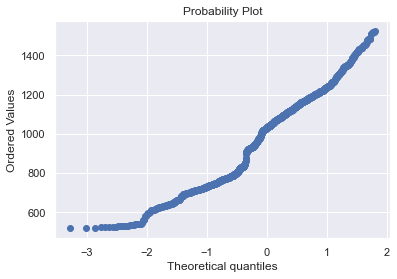

In [12]:
import scipy.stats
import pylab
scipy.stats.probplot(data['Close'], plot=pylab)
pylab.show()

In [13]:
data.isnull().sum()

Close    46
dtype: int64

In [14]:
data = data.fillna(method='ffill')

In [15]:
data.isnull().sum()

Close    0
dtype: int64

In [16]:
#Splitting Data into train and test
size = int(len(data)*0.8)
df, df_test = data[:size], data[size:]

In [17]:
df.count()

Close    1046
dtype: int64

In [18]:
data.count()

Close    1308
dtype: int64

In [19]:
df_test.count()

Close    262
dtype: int64

In [20]:
#ADFULLER TEST
sts.adfuller(df.Close)

(-1.7843411494592984,
 0.38826312137733293,
 9,
 1036,
 {'1%': -3.436677776748241,
  '5%': -2.8643338457318848,
  '10%': -2.5682575592567196},
 8300.610290793267)

<ipython-input-21-17f1070af021>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('ACF for Price', Size=24)


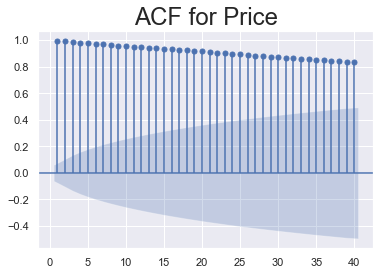

In [21]:
sgt.plot_acf(df.Close, zero=False, lags=40)
plt.title('ACF for Price', Size=24)
plt.show()

<ipython-input-22-54d4669faa73>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('PACF for Price', Size=24)


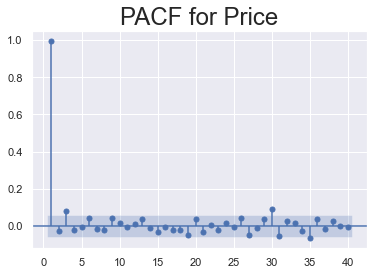

In [22]:
sgt.plot_pacf(df.Close, zero=False, lags=40)
plt.title('PACF for Price', Size=24)
plt.show()

In [23]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Model
#ARMA(1,1)
model_ar_1_ma_1 = ARMA(df.Close, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
print(results_ar_1_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(1, 1)   Log Likelihood               -4238.508
Method:                       css-mle   S.D. of innovations             13.881
Date:                Tue, 03 Jan 2023   AIC                           8485.017
Time:                        18:13:47   BIC                           8504.828
Sample:                    06-08-2015   HQIC                          8492.530
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         858.1142    160.777      5.337      0.000     542.996    1173.232
ar.L1.Close     0.9979      0.002    547.685      0.000       0.994       1.002
ma.L1.Close     0.0554      0.034      1.627    

In [25]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

In [26]:
sts.adfuller(df['res_ar_1_ma_1'])

(-11.155186634753887,
 2.8776758107198284e-20,
 11,
 1034,
 {'1%': -3.4366900467481667,
  '5%': -2.8643392574735627,
  '10%': -2.568260441619371},
 8299.218715994528)

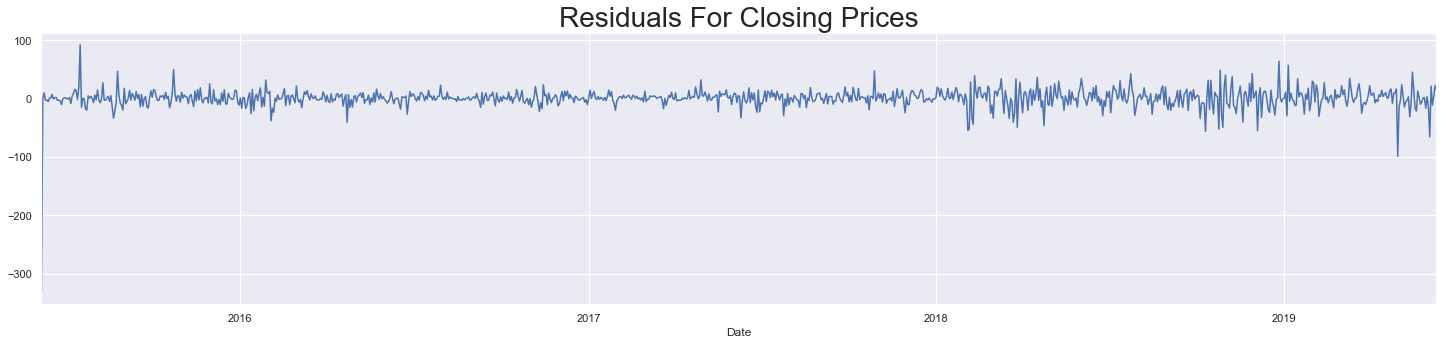

In [27]:
df.res_ar_1_ma_1.plot(figsize=(25,5))
plt.title('Residuals For Closing Prices', size=28)
plt.show()

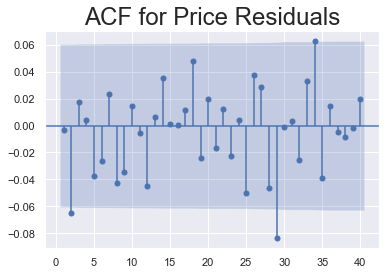

In [28]:
sgt.plot_acf(df.res_ar_1_ma_1, zero=False, lags=40)
plt.title('ACF for Price Residuals', Size=24)
plt.show()

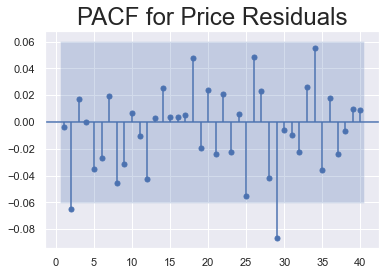

In [29]:
sgt.plot_pacf(df.res_ar_1_ma_1, zero=False, lags=40)
plt.title('PACF for Price Residuals', Size=24)
plt.show()

In [30]:
#(2,2)
#Model
#ARMA(2,2)
model_ar_2_ma_2 = ARMA(df.Close, order=(2,2))
results_ar_2_ma_2 = model_ar_2_ma_2.fit()
print(results_ar_2_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(2, 2)   Log Likelihood               -4234.703
Method:                       css-mle   S.D. of innovations             13.830
Date:                Tue, 03 Jan 2023   AIC                           8481.406
Time:                        18:13:55   BIC                           8511.123
Sample:                    06-08-2015   HQIC                          8492.676
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         854.5420    170.810      5.003      0.000     519.761    1189.323
ar.L1.Close     0.8948      0.299      2.992      0.003       0.309       1.481
ar.L2.Close     0.1033      0.298      0.346    

In [31]:
df['res_ARMA(2,2)'] = results_ar_2_ma_2.resid

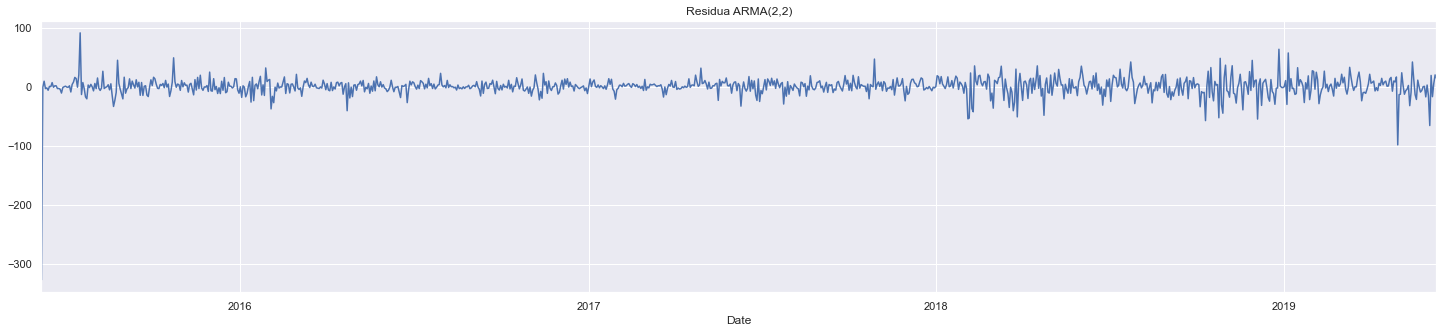

In [32]:
df['res_ARMA(2,2)'].plot(figsize=(25,5))
plt.title('Residua ARMA(2,2)')
plt.show()

In [33]:
#(2,2)
#Model
#ARMA(2,1)
model_ar_2_ma_1 = ARMA(df.Close, order=(2,1))
results_ar_2_ma_1 = model_ar_2_ma_1.fit()
print(results_ar_2_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(2, 1)   Log Likelihood               -4236.098
Method:                       css-mle   S.D. of innovations             13.849
Date:                Tue, 03 Jan 2023   AIC                           8482.195
Time:                        18:13:59   BIC                           8506.959
Sample:                    06-08-2015   HQIC                          8491.587
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         858.3443    162.200      5.292      0.000     540.439    1176.250
ar.L1.Close     0.4164      0.197      2.118      0.034       0.031       0.802
ar.L2.Close     0.5804      0.196      2.956    

In [34]:
#(2,2)
#Model
#ARMA(1,2)
model_ar_1_ma_2 = ARMA(df.Close, order=(1,2))
results_ar_1_ma_2 = model_ar_1_ma_2.fit()
print(results_ar_1_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(1, 2)   Log Likelihood               -4234.746
Method:                       css-mle   S.D. of innovations             13.830
Date:                Tue, 03 Jan 2023   AIC                           8479.493
Time:                        18:14:00   BIC                           8504.256
Sample:                    06-08-2015   HQIC                          8488.884
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         852.5777    172.240      4.950      0.000     514.993    1190.163
ar.L1.Close     0.9983      0.002    632.776      0.000       0.995       1.001
ma.L1.Close     0.0521      0.031      1.687    

In [35]:
#Chosen Models
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(2,1): \tLLR = ', results_ar_2_ma_1.llf, '\tAIC = ', results_ar_2_ma_1.aic)
print('\tARMA(1,1): \tLLR = ', results_ar_1_ma_1.llf, '\tAIC = ', results_ar_1_ma_1.aic)

	ARMA(2,1): 	LLR =  -4236.097711072625 	AIC =  8482.19542214525
	ARMA(1,1): 	LLR =  -4238.508376476662 	AIC =  8485.016752953325


### Using Returns

In [36]:
df['returns'] = df.Close.pct_change(1) * 100

In [37]:
df

,Close,res_ar_1_ma_1,"res_ARMA(2,2)",returns
Date,,,,
2015-06-08,526.830017,-331.284200,-327.712005,NaN
2015-06-09,526.690002,-0.752453,-0.727534,-0.026577
2015-06-10,536.690002,9.361258,9.391578,1.898650
2015-06-11,534.609985,-3.258113,-3.136217,-0.387564
2015-06-12,532.330017,-2.763584,-1.874641,-0.426473
...,...,...,...,...
2019-06-04,1053.050049,20.847032,19.174578,1.623198
2019-06-05,1042.219971,-11.584286,-16.856678,-1.028449
2019-06-06,1044.339966,3.139329,5.467593,0.203411


In [38]:
sts.adfuller(df.returns[1:])

(-23.778357186060095,
 0.0,
 1,
 1043,
 {'1%': -3.436635203238866,
  '5%': -2.8643150683130307,
  '10%': -2.568247558190521},
 3770.132008365741)

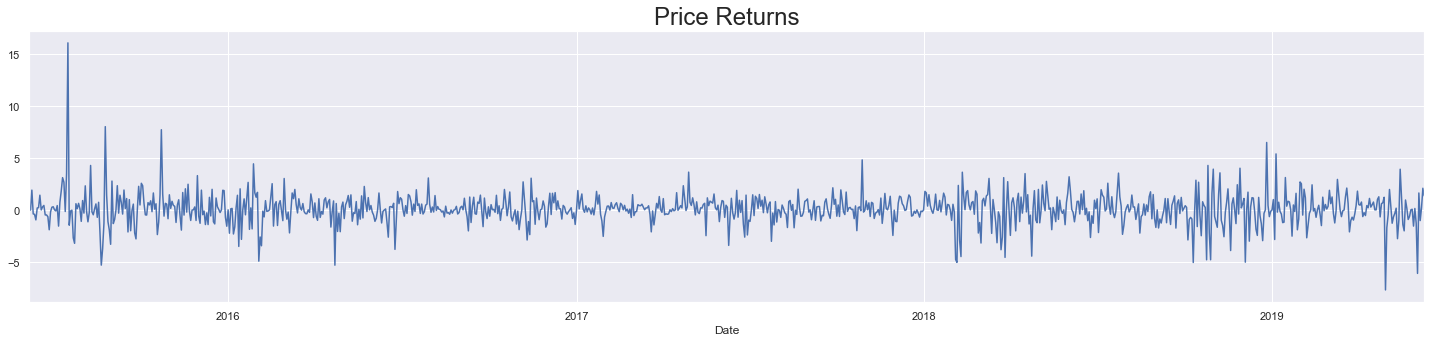

In [39]:
df.returns.plot(figsize=(25,5))
plt.title('Price Returns', size = 24)
plt.show()

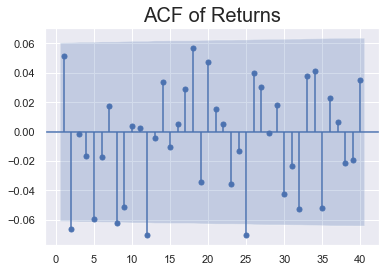

In [40]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF of Returns', size=20)
plt.show()

In [41]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1045
Model:                     ARMA(1, 1)   Log Likelihood               -1917.048
Method:                       css-mle   S.D. of innovations              1.515
Date:                Tue, 03 Jan 2023   AIC                           3842.095
Time:                        18:14:09   BIC                           3861.902
Sample:                    06-09-2015   HQIC                          3849.607
                         - 06-10-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0802      0.049      1.638      0.101      -0.016       0.176
ar.L1.returns    -0.4989      0.253     -1.973      0.049      -0.995      -0.003
ma.L1.returns     0.5652      0.240     

In [42]:
df['res_ret_ar_1_ma_1'] = results_ret_ar_1_ma_1.resid

In [43]:
df

,Close,res_ar_1_ma_1,"res_ARMA(2,2)",returns,res_ret_ar_1_ma_1
Date,,,,,
2015-06-08,526.830017,-331.284200,-327.712005,NaN,NaN
2015-06-09,526.690002,-0.752453,-0.727534,-0.026577,-0.106755
2015-06-10,536.690002,9.361258,9.391578,1.898650,1.825196
2015-06-11,534.609985,-3.258113,-3.136217,-0.387564,-0.590147
2015-06-12,532.330017,-2.763584,-1.874641,-0.426473,-0.406671
...,...,...,...,...,...
2019-06-04,1053.050049,20.847032,19.174578,1.623198,1.882124
2019-06-05,1042.219971,-11.584286,-16.856678,-1.028449,-1.402536
2019-06-06,1044.339966,3.139329,5.467593,0.203411,0.362812


In [44]:
sts.adfuller(df.res_ret_ar_1_ma_1[1:])

(-32.59500429108608,
 0.0,
 0,
 1044,
 {'1%': -3.43662916802936,
  '5%': -2.864312406409634,
  '10%': -2.5682461404339336},
 3769.665979051514)

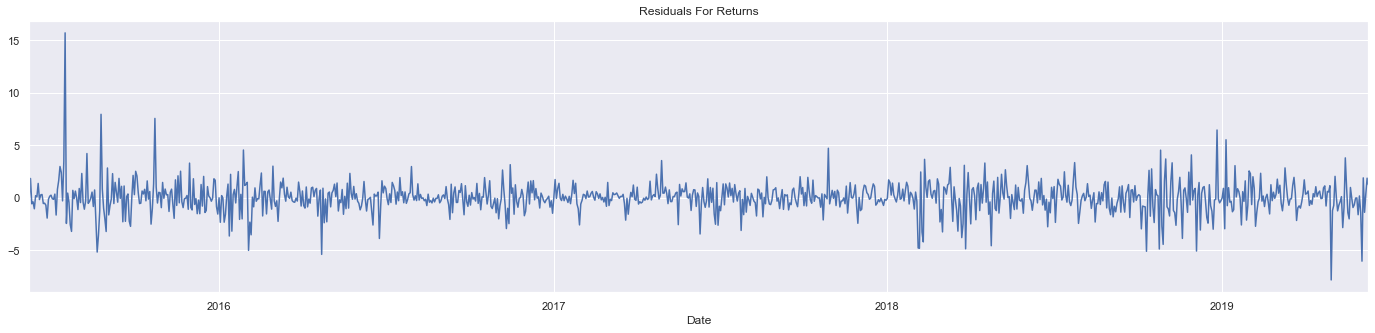

In [45]:
df.res_ret_ar_1_ma_1[1:].plot(figsize=(24,5))
plt.title('Residuals For Returns')
plt.show()

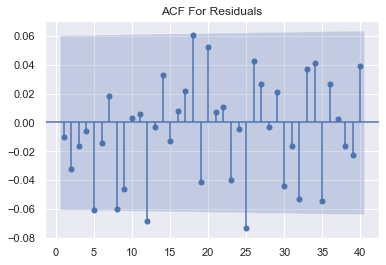

In [46]:
sgt.plot_acf(df.res_ret_ar_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF For Residuals')
plt.show()

In [47]:
#ARMA(5,5)
model_ret_ar_5_ma_5 = ARMA(df.Close, order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
print(results_ret_ar_5_ma_5.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(5, 5)   Log Likelihood               -4226.728
Method:                       css-mle   S.D. of innovations             13.718
Date:                Tue, 03 Jan 2023   AIC                           8477.455
Time:                        18:14:24   BIC                           8536.888
Sample:                    06-08-2015   HQIC                          8499.995
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1083.4570        nan        nan        nan         nan         nan
ar.L1.Close     0.5325      0.066      8.063      0.000       0.403       0.662
ar.L2.Close     0.2900      0.052      5.552    

In [48]:
df['results_ret_ar_5_ma_5'] = results_ret_ar_5_ma_5.resid

In [49]:
sts.adfuller(df.results_ret_ar_5_ma_5)

(-51.92487889710634,
 0.0,
 0,
 1045,
 {'1%': -3.4366231443991118,
  '5%': -2.864309749608104,
  '10%': -2.568244725395481},
 8281.395068841743)

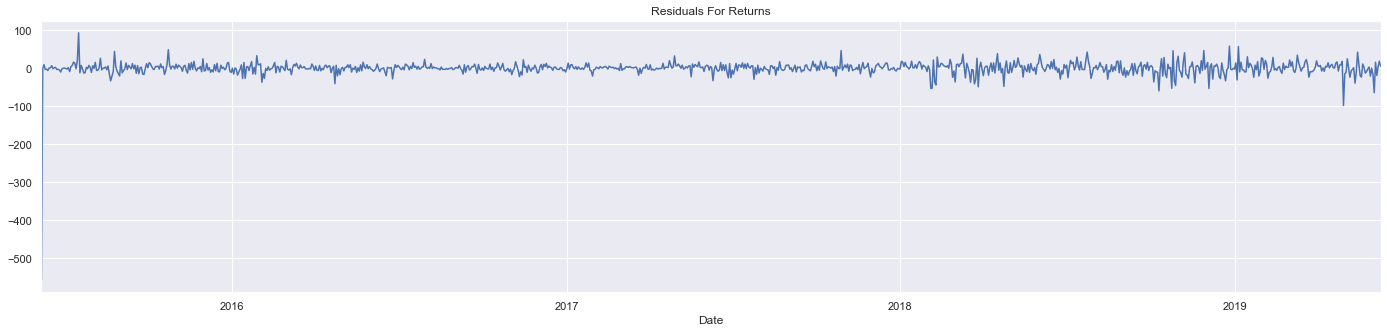

In [50]:
#results_ret_ar_5_ma_5
df.results_ret_ar_5_ma_5.plot(figsize=(24,5))
plt.title('Residuals For Returns')
plt.show()

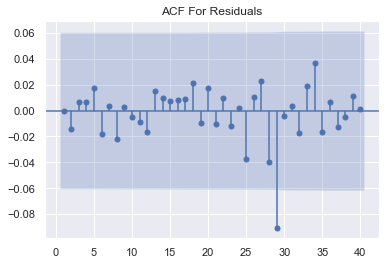

In [51]:
sgt.plot_acf(df.results_ret_ar_5_ma_5, zero=False, lags=40)
plt.title('ACF For Residuals')
plt.show()

In [52]:
#ARMA(5,4)
model_ret_ar_5_ma_4 = ARMA(df.Close, order=(5,4))
results_ret_ar_5_ma_4 = model_ret_ar_5_ma_4.fit()
print(results_ret_ar_5_ma_4.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(5, 4)   Log Likelihood               -4268.636
Method:                       css-mle   S.D. of innovations             14.227
Date:                Tue, 03 Jan 2023   AIC                           8559.271
Time:                        18:14:37   BIC                           8613.751
Sample:                    06-08-2015   HQIC                          8579.932
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1821.7914        nan        nan        nan         nan         nan
ar.L1.Close     0.1307        nan        nan        nan         nan         nan
ar.L2.Close     0.8672   7.22e-05    1.2e+04    

In [53]:
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(5,5): \tLLR = ', results_ret_ar_5_ma_5.llf, '\tAIC = ', results_ret_ar_5_ma_5.aic)
print('\tARMA(5,4): \tLLR = ', results_ret_ar_5_ma_4.llf, '\tAIC = ', results_ret_ar_5_ma_4.aic)

	ARMA(5,5): 	LLR =  -4226.72768063779 	AIC =  8477.45536127558
	ARMA(5,4): 	LLR =  -4268.635590688595 	AIC =  8559.27118137719


In [54]:
#ARMA(4,5)
model_ret_ar_4_ma_5 = ARMA(df.Close, order=(4,5))
results_ret_ar_4_ma_5 = model_ret_ar_4_ma_5.fit()
print(results_ret_ar_4_ma_5.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(4, 5)   Log Likelihood               -4227.207
Method:                       css-mle   S.D. of innovations             13.724
Date:                Tue, 03 Jan 2023   AIC                           8476.414
Time:                        18:14:45   BIC                           8530.894
Sample:                    06-08-2015   HQIC                          8497.075
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1089.2279        nan        nan        nan         nan         nan
ar.L1.Close     1.2350      0.007    166.017      0.000       1.220       1.250
ar.L2.Close    -0.6981        nan        nan    

In [55]:
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(5,5): \tLLR = ', results_ret_ar_5_ma_5.llf, '\tAIC = ', results_ret_ar_5_ma_5.aic)
print('\tARMA(4,5): \tLLR = ', results_ret_ar_4_ma_5.llf, '\tAIC = ', results_ret_ar_4_ma_5.aic)

	ARMA(5,5): 	LLR =  -4226.72768063779 	AIC =  8477.45536127558
	ARMA(4,5): 	LLR =  -4227.206805835389 	AIC =  8476.413611670778


In [56]:
#ARMA(4,2)
model_ret_ar_4_ma_2 = ARMA(df.Close, order=(4,2))
results_ret_ar_4_ma_2 = model_ret_ar_4_ma_2.fit()
print(results_ret_ar_4_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(4, 2)   Log Likelihood               -4229.100
Method:                       css-mle   S.D. of innovations             13.755
Date:                Tue, 03 Jan 2023   AIC                           8474.200
Time:                        18:14:49   BIC                           8513.822
Sample:                    06-08-2015   HQIC                          8489.226
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         855.7510    164.671      5.197      0.000     533.001    1178.501
ar.L1.Close     0.4545      0.064      7.052      0.000       0.328       0.581
ar.L2.Close    -0.3596      0.061     -5.860    

In [57]:
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(5,5): \tLLR = ', results_ret_ar_5_ma_5.llf, '\tAIC = ', results_ret_ar_5_ma_5.aic)
print('\tARMA(4,2): \tLLR = ', results_ret_ar_4_ma_2.llf, '\tAIC = ', results_ret_ar_4_ma_2.aic)

	ARMA(5,5): 	LLR =  -4226.72768063779 	AIC =  8477.45536127558
	ARMA(4,2): 	LLR =  -4229.099946524094 	AIC =  8474.199893048188


In [58]:
#ARMA(4,1)
model_ret_ar_4_ma_1 = ARMA(df.Close, order=(4,1))
results_ret_ar_4_ma_1 = model_ret_ar_4_ma_1.fit()
print(results_ret_ar_4_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1046
Model:                     ARMA(4, 1)   Log Likelihood               -4234.549
Method:                       css-mle   S.D. of innovations             13.828
Date:                Tue, 03 Jan 2023   AIC                           8483.098
Time:                        18:14:52   BIC                           8517.767
Sample:                    06-08-2015   HQIC                          8496.246
                         - 06-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         855.9604    168.630      5.076      0.000     525.451    1186.469
ar.L1.Close     0.9907      0.380      2.608      0.009       0.246       1.735
ar.L2.Close    -0.0760      0.399     -0.191    

In [59]:
#Chosing the best Algorithm using LLR and AIC
print('\tARMA(5,5): \tLLR = ', results_ret_ar_5_ma_5.llf, '\tAIC = ', results_ret_ar_5_ma_5.aic)
print('\tARMA(4,1): \tLLR = ', results_ret_ar_4_ma_1.llf, '\tAIC = ', results_ret_ar_4_ma_1.aic)

	ARMA(5,5): 	LLR =  -4226.72768063779 	AIC =  8477.45536127558
	ARMA(4,1): 	LLR =  -4234.549080324903 	AIC =  8483.098160649806
